## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with Consumer Complaint Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import math
from sklearn.metrics import accuracy_score, f1_score
import itertools
from sklearn.model_selection import train_test_split


The consumer complaint dataset comprises around 5000 complaints on six products.

In [2]:
# Read the csv file consumer_complaints.csv
mydata_train = pd.read_csv('C:/Users/Shivapriya B/Desktop/NEU Work/Classwork/Semester 4/Natural Language Processing/Week 5/consumer_complaints.csv')

In [3]:
# Print the product groups in the dataset
print(list(mydata_train.Product))

['Credit card or prepaid card', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Vehicle loan or lease', 'Debt collection', 'Debt collection', 'Mortgage', 'Vehicle loan or lease', 'Mortgage', 'Credit card or prepaid card', 'Checking or savings account', 'Credit card or prepaid card', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Student loan', 'Mortgage', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Credit card or prepaid card', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Vehicle loan or lease', 'Student loan', 'Vehicle loan or lease', 'Debt collection', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Student loan', 'Student loan', 'Mortgage', 'Checking or savings account', 'Student loan', 'Vehicle loan or l

In [4]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Check the length of the data
print(len(mydata_train.Product))
print(len(mydata_train.Consumer_complaint_narrative))

5000
5000


### Expected Output: 
5000

5000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text = mydata_train.Consumer_complaint_narrative
text.head()

0    I lost my credit card ( a Chase Sapphire Reser...
1    Having problems finding out LTV from mortgage ...
2    I am a victim of identity theft and this debt ...
3    Yesterday evening I spoke to a rep in regards ...
4    I opened a prepaid bank account with REVOLUT i...
Name: Consumer_complaint_narrative, dtype: object

## Preprocessing the Corpus

In [71]:
# Preprocessing the data

lines = [] 
word_list = [] 
tmp = [];

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    tmp.append(line.split(' '));

lines = [item for tmp_lst in tmp for item in tmp_lst];

# Make sure the word_list contains unique tokens
word_list = list(set(lines));

# Calculate the total documents present in the corpus
total_docs = len(text);
 
#Create a dictionary to keep track of index of each word
dict_idx = {};
for doc in text:
    for word in doc.split(' '):
        tmp_index = list(text).index(doc);
        if word not in dict_idx:
            dict_idx[word] = [];
            dict_idx[word].append(list(text).index(doc));
        elif tmp_index not in dict_idx[word]:
            dict_idx[word].append(tmp_index);

In [88]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {};
    for token in list(set(lines)):
        if token not in freq_word:
            freq_word[token] = 0;
        freq_word[token] = sum(map(lambda lines: token in lines, text))
    return freq_word

In [89]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'': 5000,
 'withholding': 16,
 '{$590.00}': 15,
 'Picking': 1,
 'SUPER': 6,
 'apx': 3,
 'salt': 1,
 'Serial': 1,
 'immediately!': 4,
 'LIMIT': 6,
 'legible.': 2,
 'patient,': 2,
 '\n\nHowever,': 26,
 'valuation': 14,
 '\nplease': 1,
 'March,': 1,
 're-send?': 1,
 '48': 77,
 'lay': 222,
 'tribal': 1,
 'earnings.': 4,
 'bankruptcy?': 1,
 'onXXXX.': 1,
 'expired.\n\n7.': 1,
 'banks.': 13,
 'upload.': 2,
 'MATTER,': 1,
 'inflating': 3,
 'Finance,': 2,
 'quantifiable.': 1,
 'bullies.': 1,
 'N.A.': 4,
 'Form': 11,
 'sue': 1026,
 'TESTIFY': 1,
 'SouthWest': 1,
 'reward': 61,
 'which,': 10,
 'accuracy,': 1,
 '54': 33,
 'Respondeat': 1,
 'full.\n\n25.': 1,
 'UNVERIFIED': 3,
 'heels.': 1,
 'quote.': 6,
 'horrified': 1,
 '\n\nOnly': 2,
 'host': 22,
 'hard': 282,
 'Fannie': 3,
 'forceful': 6,
 'CAR': 69,
 'insurace': 2,
 '{$720.00}': 3,
 'intelligence,': 1,
 'Reached': 2,
 '{$1500.00}.': 12,
 'filter,': 1,
 'CONTINUED': 1,
 'owes.': 3,
 'fleet': 1,
 '{$60000.00}': 2,
 'urgently': 4,
 'completng':

In [90]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    n = len(document);
    c = document.count(word);
    tf = c/n;
    
    return tf

In [91]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    df = freq_word[word];
    N = len(text);
    
    idf = math.log(N/(df + 1));
    
    return idf

In [100]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = [[0 for x in range(len(dict_idx))] for y in range(len(sentence))];
    
    ctr = 0;
    
    for key in dict_idx:
        idf = inverse_df(key);
        docs = dict_idx[key];
        for doc in docs:
            tf = term_frequency(sentence[doc], key);
            tf_idf_vec[doc][ctr] = tf * idf;
        ctr = ctr + 1;
        
    return tf_idf_vec

In [101]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

tf_idf_vectors = tfidf(text,dict_idx);
tf_idf_df = pd.DataFrame(tf_idf_vectors, columns = word_list);

## Multinomial Naive Bayes (10 Points)

In [110]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB().fit(tf_idf_df, mydata_train.Product)

In [111]:
model

MultinomialNB()

In [112]:
#Perform testing on the train dataset

pred = model.predict(tf_idf_df)

In [122]:
#Calculate the F1 Score and the Accuracy

F1_score = f1_score(mydata_train.Product, pred, average='macro')
Accuracy = accuracy_score(mydata_train.Product, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.7952217972394341
Accuracy:  0.8934


### Expected Output:
F1 Score: 0.8081311697005633

Accuracy: 0.826

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [124]:
# install libraries
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=0283329570d83c03922fd90a2d9fbc11be0c41b7054871da8b18521f7cb48e52
  Stored in directory: c:\users\shivapriya b\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [271]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics =  ["Northeastern Unversity", "Natural language processing", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Citibank", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Cricket", "Football", "College Football", "Association Football"]

# list of articles to be downloaded
articles = list(itertools.chain.from_iterable([wikipedia.search(topic, 2) for topic in topics]));
articles_num = [2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4]

# download and store articles (summaries) in this variable
data = []
article = 'Data Science'
for article in articles:
    try:
        data.append(wikipedia.page(article).content)      
    except WikipediaException:
        print (article)
        pass
    except:
        pass

Northeastern University
Citibank India
Swimming (sport)


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

I am choosing to clean the data to ensure the following - 
1. Stop words which are not useful for our clustering is removed so that we do not get unnecessary clusters in the process
2. Hyperlinks will not help with the clustering process overall
3. Words with the same root should not be considered different during the clustering process

In [272]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    tmp_msg = message;
    #     Convert to lowercase
    tmp_msg = ''.join([word.lower() for word in tmp_msg])
    # Replace all stop words with space
    stop_words = stopwords.words('english');
    tmp_msg = ' '.join([word for word in tmp_msg.split() if word not in stop_words])
    #  Remove hyper links in text
    tmp_msg = re.sub('http\S+', '', tmp_msg)
    # Replace all punctuations with space
    tmp_msg = ''.join([word for word in tmp_msg if word not in set(string.punctuation)])
#     Stem each word in the review and append it to final review
    lem = WordNetLemmatizer();
    tmp_msg = ' '.join([lem.lemmatize(word) for word in tmp_msg.split()]);
    message = tmp_msg;
    
    return message

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [275]:
from sklearn.feature_extraction.text import CountVectorizer
 
data = [clean_message(message) for message in data];

cv = CountVectorizer()
X = cv.fit_transform(data)

In [276]:
print(X.shape)

(30, 13720)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [277]:
from sklearn.manifold import TSNE

X_vis = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)

Plot and annotate the points with different markers for different expected groups.

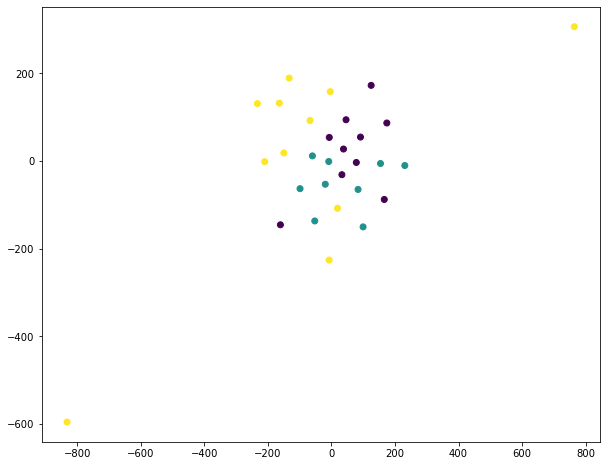

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns 

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c = articles_num)

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
The overall categorization done by T-SNE is not as expected. There are outliers of one category  that is not in its intended cluster. The first cluster is partially defined whereas the second and third clusters have very little distinction between them to individually be identified otherwise.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
    tmp_msg = text;
    #     Convert to lowercase
    tmp_msg = ''.join([word.lower() for word in tmp_msg])
    # Replace all stop words with space
    stop_words = stopwords.words('english');
    tmp_msg = ' '.join([word for word in tmp_msg.split() if word not in stop_words])
    #  Remove hyper links in text
    tmp_msg = re.sub('http\S+', '', tmp_msg)
    # Replace all punctuations with space
    tmp_msg = ''.join([word for word in tmp_msg if word not in set(string.punctuation)])
#     Stem each word in the review and append it to final review
    lem = WordNetLemmatizer();
    tmp_msg = ' '.join([lem.lemmatize(word) for word in tmp_msg.split()]);
    text = tmp_msg;
    
    return text

[nltk_data] Downloading package stopwords to C:\Users\Shivapriya
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shivapriya
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Shivapriya
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [3]:
# Import the data.csv only use 'text' and 'target' columns

data = pd.read_csv(r"C:/Users/Shivapriya B/Desktop/NEU Work/Classwork/Semester 4/Natural Language Processing/Week 5/data.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col in ["text", "target"])

# expected shape of dataset is (7613, 2)
data.shape

(7613, 2)

In [4]:
# clean the text in the dataframe using the clean_text function provided above
data.text = [clean_text(text) for text in data.text]

In [5]:
# printout the train.shape and validation.shape 

x_train_tmp, x_test, y_train_tmp, y_test = train_test_split(data.text, data.target, test_size=0.2);
x_train, x_val, y_train, y_val = train_test_split(x_train_tmp, y_train_tmp, test_size=0.2);
print ("Training Data Shape ")
print(len(x_train))
print(len(y_train))
print ("Validation Data Shape ")
print(len(x_val))
print(len(y_val))

Training Data Shape 
4872
4872
Validation Data Shape 
1218
1218


In [36]:
# initialise count vectorizer from sklearn module with default parameter
cv = CountVectorizer()

# fit and transform on dataset
X = cv.fit_transform(data.text).toarray()

In [37]:
# get the values of target column

y = data.target

In [38]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

model = Sequential()
    
  # layer 1 : input layer
inp = tf.keras.Input((X.shape[1],))
model.add(inp)
model.add(layers.Dense(64, activation=activations.relu))

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
    
    model = Sequential()
    
  # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    model.add(inp)

  # layer 2 : add the dense layer with 64 units and relu activation
    model.add(layers.Dense(64, activation=activations.relu))
    
  # layer 3 : add the dropout layer with dropout rate of 0.5
    model.add(Dropout(0.5))
    
  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    model.add(layers.Dense(32, activation=activations.tanh, kernel_regularizer=l2()))
    
  # layer 5 : add the dropout layer with dropout rate of 0.5
    model.add(Dropout(0.5))

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    model.add(layers.Dense(16, activation=activations.tanh, kernel_regularizer=l2()))

  # layer 7 : add the dropout layer with dropout rate of 0.5
    model.add(Dropout(0.5))
    
  # layer 8 : output layer with units equal to 1 and activation as sigmoid
    model.add(layers.Dense(units=1, activation='sigmoid'))

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    model.compile(loss= tf.keras.losses.BinaryCrossentropy(), optimizer='rmsprop', metrics=[tf.keras.metrics.AUC()])

    return model

Epoch 1/10
381/381 [==============================] - 15s 29ms/step - loss: 0.7818 - auc_17: 0.7529 - val_loss: 0.6448 - val_auc_17: 0.7385
Epoch 2/10
381/381 [==============================] - 12s 33ms/step - loss: 0.4850 - auc_17: 0.8791 - val_loss: 0.6347 - val_auc_17: 0.7350
Epoch 3/10
381/381 [==============================] - 8s 22ms/step - loss: 0.4257 - auc_17: 0.9003 - val_loss: 0.6334 - val_auc_17: 0.7379
Epoch 4/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3957 - auc_17: 0.9124 - val_loss: 0.6373 - val_auc_17: 0.7355
Epoch 5/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3792 - auc_17: 0.9173 - val_loss: 0.6295 - val_auc_17: 0.7345
Epoch 6/10
381/381 [==============================] - 8s 22ms/step - loss: 0.3681 - auc_17: 0.9215 - val_loss: 0.6379 - val_auc_17: 0.7361
Epoch 7/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3499 - auc_17: 0.9282 - val_loss: 0.6404 - val_auc_17: 0.7378
Epoch 8/10
381/381 [=====

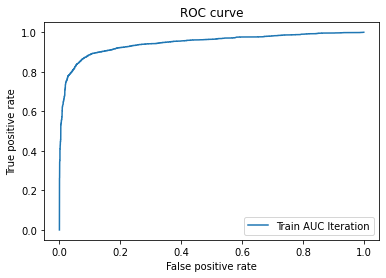

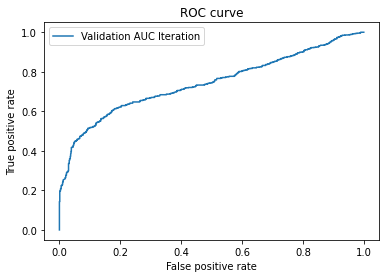

Epoch 1/10
381/381 [==============================] - 15s 33ms/step - loss: 0.7803 - auc_18: 0.7544 - val_loss: 0.6776 - val_auc_18: 0.6993
Epoch 2/10
381/381 [==============================] - 8s 22ms/step - loss: 0.4735 - auc_18: 0.8865 - val_loss: 0.6954 - val_auc_18: 0.7057
Epoch 3/10
381/381 [==============================] - 10s 26ms/step - loss: 0.4116 - auc_18: 0.9076 - val_loss: 0.7031 - val_auc_18: 0.7082
Epoch 4/10
381/381 [==============================] - 14s 38ms/step - loss: 0.3741 - auc_18: 0.9220 - val_loss: 0.7418 - val_auc_18: 0.7032 los
Epoch 5/10
381/381 [==============================] - 12s 32ms/step - loss: 0.3548 - auc_18: 0.9286 - val_loss: 0.7360 - val_auc_18: 0.7018
Epoch 6/10
381/381 [==============================] - 11s 29ms/step - loss: 0.3443 - auc_18: 0.9318 - val_loss: 0.7296 - val_auc_18: 0.7023
Epoch 7/10
381/381 [==============================] - 9s 23ms/step - loss: 0.3330 - auc_18: 0.9351 - val_loss: 0.7982 - val_auc_18: 0.6994
Epoch 8/10
381/381

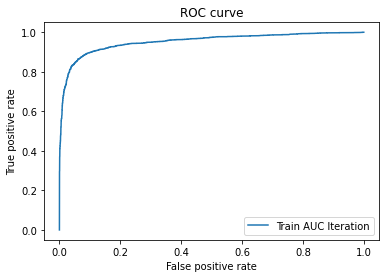

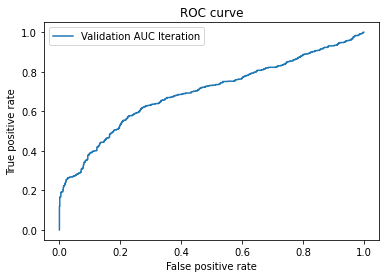

Epoch 1/10
381/381 [==============================] - 11s 22ms/step - loss: 0.7807 - auc_19: 0.7377 - val_loss: 0.6500 - val_auc_19: 0.7533
Epoch 2/10
381/381 [==============================] - 9s 24ms/step - loss: 0.4715 - auc_19: 0.8838 - val_loss: 0.6413 - val_auc_19: 0.7574
Epoch 3/10
381/381 [==============================] - 8s 22ms/step - loss: 0.4123 - auc_19: 0.9058 - val_loss: 0.6697 - val_auc_19: 0.7578
Epoch 4/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3811 - auc_19: 0.9172 - val_loss: 0.6764 - val_auc_19: 0.7591
Epoch 5/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3604 - auc_19: 0.9245 - val_loss: 0.6606 - val_auc_19: 0.7594
Epoch 6/10
381/381 [==============================] - 8s 22ms/step - loss: 0.3464 - auc_19: 0.9293 - val_loss: 0.6684 - val_auc_19: 0.7592
Epoch 7/10
381/381 [==============================] - 9s 24ms/step - loss: 0.3430 - auc_19: 0.9298 - val_loss: 0.6846 - val_auc_19: 0.7597
Epoch 8/10
381/381 [======

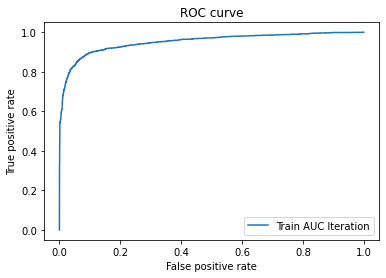

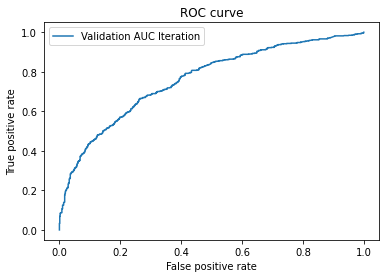

Epoch 1/10
381/381 [==============================] - 10s 22ms/step - loss: 0.7795 - auc_20: 0.7381 - val_loss: 0.6750 - val_auc_20: 0.7176
Epoch 2/10
381/381 [==============================] - 8s 21ms/step - loss: 0.4788 - auc_20: 0.8826 - val_loss: 0.6667 - val_auc_20: 0.7270
Epoch 3/10
381/381 [==============================] - 8s 22ms/step - loss: 0.4152 - auc_20: 0.9073 - val_loss: 0.6627 - val_auc_20: 0.7285
Epoch 4/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3826 - auc_20: 0.9191 - val_loss: 0.6667 - val_auc_20: 0.7298
Epoch 5/10
381/381 [==============================] - 8s 20ms/step - loss: 0.3650 - auc_20: 0.9248 - val_loss: 0.6892 - val_auc_20: 0.7288
Epoch 6/10
381/381 [==============================] - 8s 22ms/step - loss: 0.3520 - auc_20: 0.9288 - val_loss: 0.6766 - val_auc_20: 0.7291
Epoch 7/10
381/381 [==============================] - 8s 21ms/step - loss: 0.3408 - auc_20: 0.9333 - val_loss: 0.6844 - val_auc_20: 0.7290
Epoch 8/10
381/381 [======

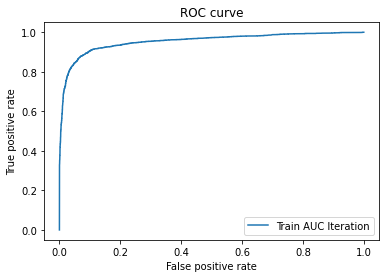

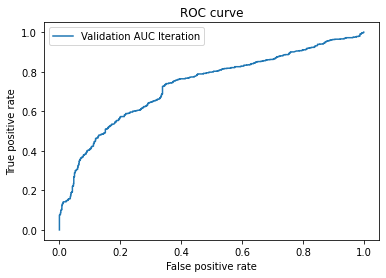

Epoch 1/10
381/381 [==============================] - 10s 21ms/step - loss: 0.8020 - auc_21: 0.7022 - val_loss: 0.5719 - val_auc_21: 0.8416
Epoch 2/10
381/381 [==============================] - 8s 21ms/step - loss: 0.5011 - auc_21: 0.8672 - val_loss: 0.5073 - val_auc_21: 0.8512
Epoch 3/10
381/381 [==============================] - 8s 21ms/step - loss: 0.4389 - auc_21: 0.8943 - val_loss: 0.5126 - val_auc_21: 0.8536
Epoch 4/10
381/381 [==============================] - 8s 20ms/step - loss: 0.4141 - auc_21: 0.9049 - val_loss: 0.4992 - val_auc_21: 0.8549
Epoch 5/10
381/381 [==============================] - 11s 28ms/step - loss: 0.3909 - auc_21: 0.9139 - val_loss: 0.5062 - val_auc_21: 0.8534
Epoch 6/10
381/381 [==============================] - 14s 38ms/step - loss: 0.3749 - auc_21: 0.9201 - val_loss: 0.5034 - val_auc_21: 0.8529
Epoch 7/10
381/381 [==============================] - 9s 24ms/step - loss: 0.3645 - auc_21: 0.9236 - val_loss: 0.4949 - val_auc_21: 0.8536
Epoch 8/10
381/381 [====

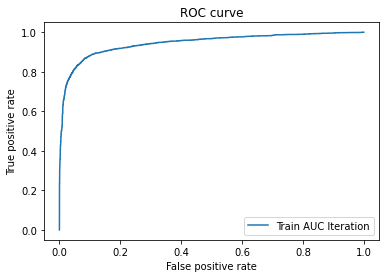

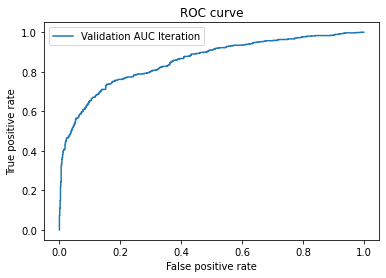

In [58]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

skf = StratifiedKFold(n_splits=5)

# Now Split the countvectors and target (y)
splits = skf.get_n_splits(X, y);

# iterate through the train and valid index in splits for 5 folds
for train_i, val_i in skf.split(X, y):

  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_i], X[val_i];
    y_train, y_valid = y[train_i], y[val_i];

  #call the build_model function and initialize the model
    model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
#   adjust batch size according to your computation power (suggestion use : 16)
    history = model.fit(X_train, y_train, batch_size = 16, epochs = 10, validation_data =(X_valid, y_valid));

  # plot the graph between training auc and validation auc
    y_pred_train = model.predict(X_train).ravel();
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train);
    y_pred_val = model.predict(X_valid).ravel();
    fpr_val, tpr_val, thresholds_val = roc_curve(y_valid, y_pred_val);

    plt.figure(0).clf()

#     Plotting Training 
    plt.plot(fpr_train, tpr_train, label='Train AUC Iteration')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
#     Plotting Validation 
    plt.plot(fpr_val, tpr_val, label='Validation AUC Iteration')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

**Answer:** 

We see that the plots in this case are curved in nature. We observe the following for the training and validation plots - 

1. Over the iterations, the training AUC has a much more clearly defined knee shape which does not change over the various folds interpretable as high separability between classes
1. Over the iterations, the validation AUC has a much less defined shape which although is over 0.5 indicating separability - the curve fluctuates over the iterations in the comparison between TPR and FPR and ends the last split with the highest AUC

# Building Multinomial Navie Bayes on Countvectors

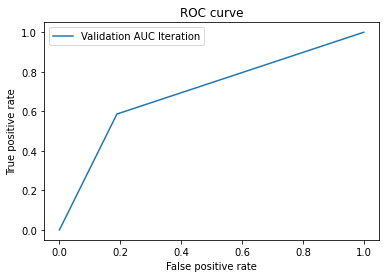

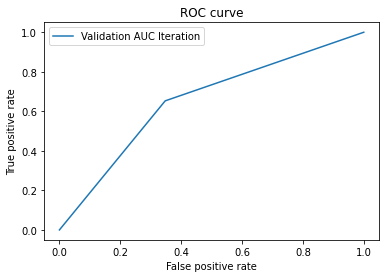

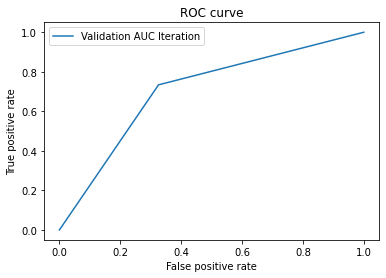

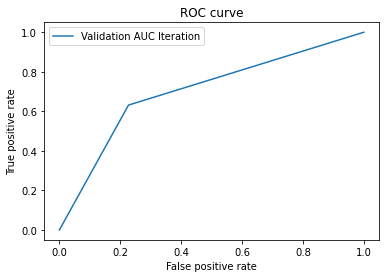

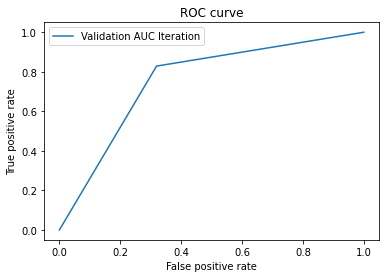

In [59]:
for train_i, val_i in skf.split(X, y):

  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_i], X[val_i];
    y_train, y_valid = y[train_i], y[val_i];

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for train_i, val_i in skf.split(X, y):
    
  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_i], X[val_i];
    y_train, y_valid = y[train_i], y[val_i];

  # intialise multinomial navie bayes with default parameters
  #Fit a Multinomial Naive Bayes Model on our dataset

    model = MultinomialNB()
    
  # fit the data
    model_fit = model.fit(X_train, y_train)
  
  # plot AUC-ROC curve for validation data
    y_pred_val = model.predict(X_valid).ravel();
    fpr_val, tpr_val, thresholds_val = roc_curve(y_valid, y_pred_val);

    plt.figure(0).clf()

#     Plotting Validation 
    plt.plot(fpr_val, tpr_val, label='Validation AUC Iteration')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

**Answer:** 

We see that the plots in this case are clearly joined at one point instead of having a curved shape as seen in the neural network implementation.Over the iterations, the validation AUC gradually increases towards the higher side except for iteration 4 over the iterations in the comparison between TPR and FPR and ends the last split with the highest AUC

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** 

*Count Vectorizer* is a method to transform the textual document provided into their counterpart tokens and associated frequency of occurence. This gives higher importance to more frequently occuring words in the document.

*TF-IDF* on the other hand is a more advanced form of count vectorizer. This method transforming textual document provided into their counterpart tokens takes into account the importance of words in terms of idf which gives us the total number of documents divided by the number of documents that contain the token. This methodology produces sparse vectors. 

*Word2Vec* on the other hand is different from the above two wherein word embedding is key - this methodology uses probability distribution of a token's placement before or after another to produce the vectors for training in comparison to the tf-idf weight vectors. 

*Glove* is an unsupervised methodology that produces dense vectors instead of sparse vectors by calculating the occurences on a word to word basis to understand the importance. 

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

Naive Bayes Implementation can be done by both BoW which uses Count Vectorization and TF-IDF methdology. Count vectorization or BoW implementation simply takes the occurence of a token in a document and uses it to train the Naive Bayes model. This implementation can sometimes be skewed in results due to commonly occuring words across the corpus. 

This problem is rectified by the TF-IDF methodology which also produces a sparse matrix by not just taking the count of occurence of a token in a document but also takes into account a second component called 'idf' which basically takes into account inverse document frequency ie. the total number of documents divided by the number of documents that contains the said token. This value is key as it reduces the power of more frequently occuring words in the corpus.